## CMPE 462 HOMEWORK 2


In [1]:
# Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib

# Part 1: Dimensionality Reduction

# A: Creating Datasets
Steps:
* Generate 500 points from $\frac{x^2}{2^2}+ \frac{y^2}{5^2} \le 1$(From ellipse with 2, 5 radius on the x and y axes respectively). Example way:
    - Generate 500 angle values $\{\theta^t\}$ in range $[-\pi,+\pi]$
    - Generate 500 values $\{r^t\}$ in range $[0,1]$
    - Generate 500 points $\{x^t,y^t\}$ where $x^t = 2r^tsin(\theta^t)$ and $y^t = 5r^tcos(\theta^t)$.
* Generate 3 set of labels. Do it by dividing data using following Lines (eg. one side of line is label 0, other side is label 1)
    - $y=0$ line
    - $x=0$ line 
    - $y=3x +1$ line 
* Visualize points with each set of labels in subplots with 1 row, 3 columns where each column corresponds to one set of labels. (Use different colors for each label.)  

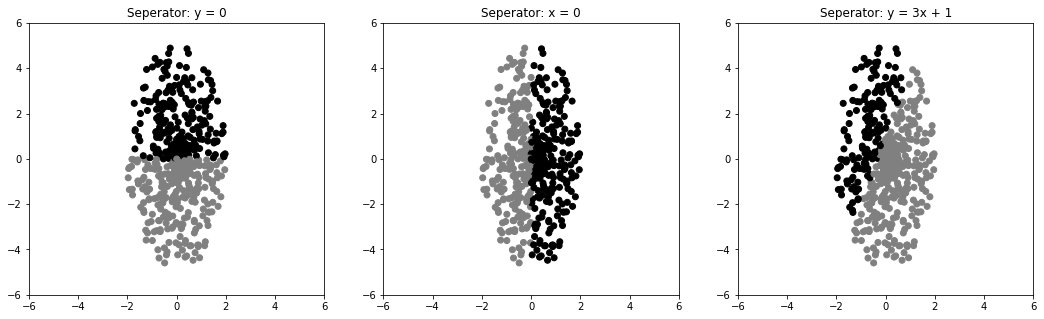

In [2]:
SIZE = 500
COLORS = ['gray','black']

def generate_labels(data):
    labels = []
    for p in data:
        first_label = 0 if p[1] < 0 else 1
        second_label = 0 if p[0] < 0 else 1
        third_label = 0 if (p[1] < (3*p[0] + 1)) else 1
        labels.append((first_label,second_label,third_label))
    return np.array(labels)
        
def generate_x_y_values(theta_values,r_values):
    x_values = []
    y_values = []
    for index,r in enumerate(r_values):
        x_values.append(2*r*np.sin(theta_values[index]))
        y_values.append(5*r*np.cos(theta_values[index]))
    return np.array(x_values),np.array(y_values)

def create_dataset():
    #theta_values = np.random.uniform(-np.pi,np.pi,size=SIZE)
    theta_values = np.random.uniform(-180,180,size=SIZE)
    r_values = np.random.rand(SIZE)
    x_values,y_values = generate_x_y_values(theta_values,r_values)
    data = np.zeros([SIZE,2])
    data[:,0] = x_values[:]
    data[:,1] = y_values[:]
    return data

def visualize_data(data,labels):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    x_values = data[:,0]
    y_values = data[:,1]
    lim = [-6.0,6.0]
    
    axs[0].scatter(x_values, y_values, c=labels[:,0], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_xlim(lim)
    axs[0].set_ylim(lim)
    axs[0].set_title('Seperator: y = 0')
    
    axs[1].scatter(x_values, y_values, c=labels[:,1], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_xlim(lim)
    axs[1].set_ylim(lim)
    axs[1].set_title('Seperator: x = 0')
    
    axs[2].scatter(x_values, y_values, c=labels[:,2], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_xlim(lim)
    axs[2].set_ylim(lim)
    axs[2].set_title('Seperator: y = 3x + 1')
    
    
    plt.show()
    
data = create_dataset()
labels = generate_labels(data)

visualize_data(data,labels)

# B: Applying PCA
Steps:
* Write PCA function.
* Apply PCA to data you generated.
* Visualize each set of labels using first principle component. 
* Visualize each set of labels using second principle component. 

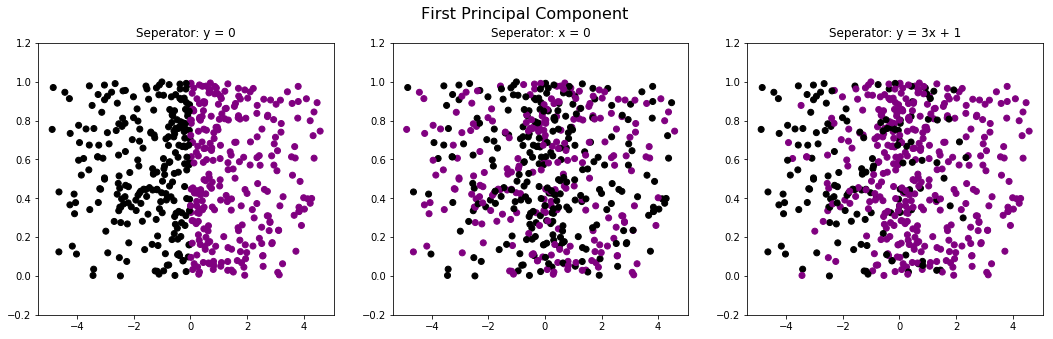

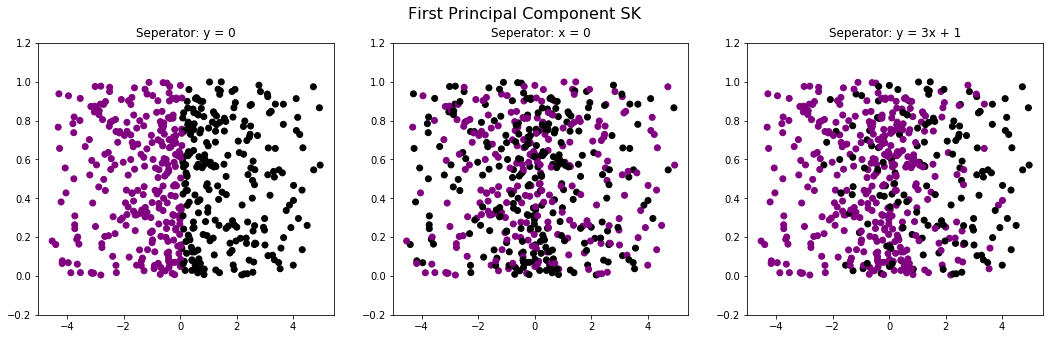

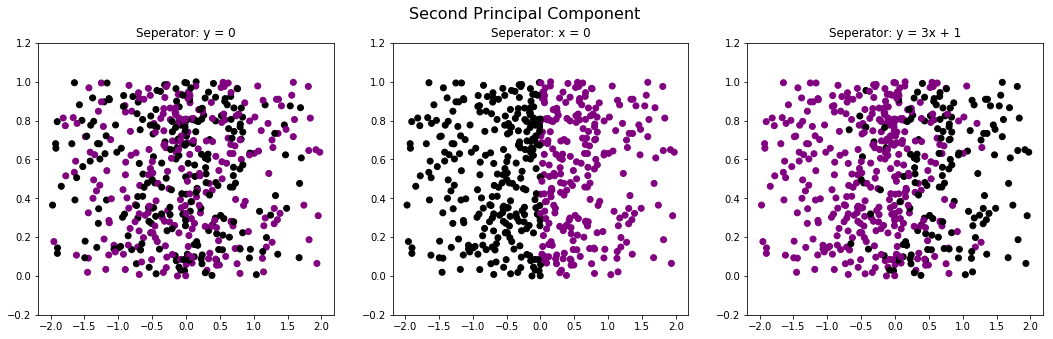

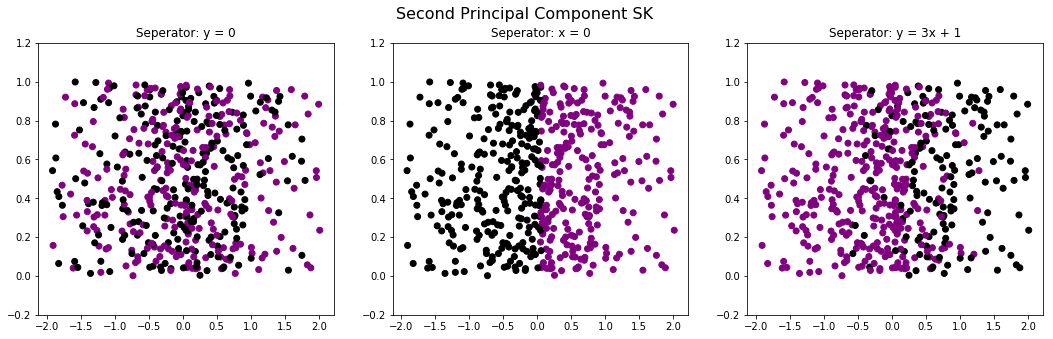

In [3]:
from sklearn.decomposition import PCA
COLORS = ['purple','black']
def pca(data):
    covariance_matrix = np.cov(data.T)
    
    eigenvalues,eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indexes = np.argsort(eigenvalues)
    pc1_index = sorted_indexes[-1]
    pc2_index = sorted_indexes[-2]
    
    pc1_eigenvector = eigenvectors[pc1_index]
    pc2_eigenvector = eigenvectors[pc2_index]
    
    pc1 = data.dot(pc1_eigenvector)
    pc2 = data.dot(pc2_eigenvector)
    return pc1,pc2

def visualize_pca(x,labels,title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    lim = [-0.2,1.2]
    y = np.random.rand(SIZE)
    
    fig.suptitle(title, fontsize=16)
    axs[0].scatter(x, y, c=labels[:,0], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_ylim(lim)
    axs[0].set_title('Seperator: y = 0')

    axs[1].scatter(x, y, c=labels[:,1], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_ylim(lim)
    axs[1].set_title('Seperator: x = 0')

    axs[2].scatter(x, y, c=labels[:,2], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_ylim(lim)
    axs[2].set_title('Seperator: y = 3x + 1')

    plt.show()

    
def sk_pca(data):
    pca = PCA()
    res = pca.fit_transform(data)

    pc1_true = res[:,0] 
    pc2_true = res[:,1]
    
    return pc1_true,pc2_true

pc1,pc2 = pca(data)
pc1_true,pc2_true = sk_pca(data)

visualize_pca(pc1,labels,"First Principal Component")
visualize_pca(pc1_true,labels,"First Principal Component SK")

visualize_pca(pc2,labels,"Second Principal Component")
visualize_pca(pc2_true,labels,"Second Principal Component SK")

# C: Applying LDA
Steps:
* Apply LDA(https://scikit-learn.org/stable/modules/lda_qda.html) to data for each label set. You can use sklearn implementation.
* Visualize each set of labels using first component of corresponding LDA. 

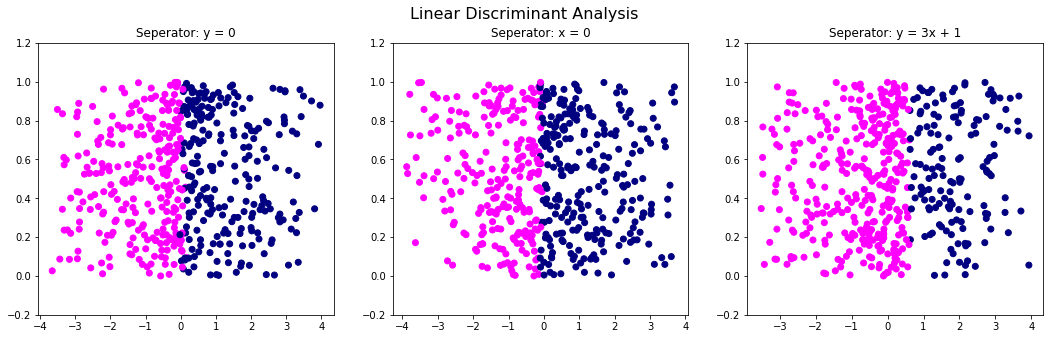

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
COLORS = ['magenta','navy']
def lda(data,labels):    
    clf = LinearDiscriminantAnalysis()
    projected_data = clf.fit(data,y=labels).transform(data)
    return projected_data

def visualize_lda(models,labels,title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    lim = [-0.2,1.2]
    y = np.random.rand(SIZE)
    
    fig.suptitle(title, fontsize=16)
    axs[0].scatter(models[0], y, c=labels[:,0], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_ylim(lim)
    axs[0].set_title('Seperator: y = 0')

    axs[1].scatter(models[1], y, c=labels[:,1], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_ylim(lim)
    axs[1].set_title('Seperator: x = 0')

    axs[2].scatter(models[2], y, c=labels[:,2], cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_ylim(lim)
    axs[2].set_title('Seperator: y = 3x + 1')

    plt.show()
    
lda_models = [lda(data,labels[:,i]) for i in range(3)]
visualize_lda(lda_models,labels,"Linear Discriminant Analysis")

# D: Nonlinear Data
Steps:
* Use generated data below.
* Apply PCA and LDA to this data, and visualize it(seperately).

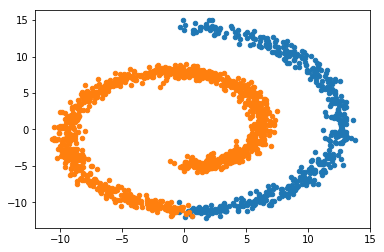

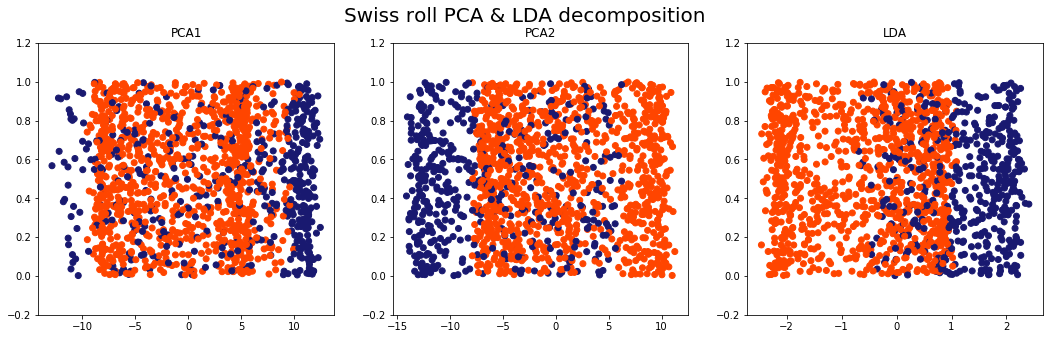

In [5]:
def genData():
    from sklearn.datasets import make_swiss_roll 
    n_samples = 1500
    noise = 0.5
    X, t = make_swiss_roll(n_samples, noise)
    # Make it thinner
    fig = plt.figure()
    Data = np.zeros([1500,2])
    Data[:,0] = X[:,0]
    Data[:,1] = X[:,2]
    Labels = np.zeros([1500,])
    Labels[t>11]=1

    plt.scatter(Data[Labels==1, 0], Data[Labels==1, 1],
       s=20,)
    plt.scatter(Data[Labels==0, 0], Data[Labels==0, 1],
       s=20,)
    return Data,Labels
Data,Labels=genData()

COLORS = ['orangered','midnightblue']
def visualize_data(pc1,pc2,lda,labels):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    lim = [-0.2,1.2]
    y = np.random.rand(len(pc1))
    
    fig.suptitle('Swiss roll PCA & LDA decomposition', fontsize=20)
    axs[0].scatter(pc1, y, c=labels, cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[0].set_ylim(lim)
    axs[0].set_title('PCA1')

    axs[1].scatter(pc2, y, c=labels, cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[1].set_ylim(lim)
    axs[1].set_title('PCA2')

    axs[2].scatter(lda, y, c=labels, cmap=matplotlib.colors.ListedColormap(COLORS))
    axs[2].set_ylim(lim)
    axs[2].set_title('LDA')

    plt.show()

pc1_,pc2_ = pca(Data)
lda_ = lda(Data,Labels)
visualize_data(pc1_,pc2_,lda_,Labels)

# Part 2: Parametric and Non-Parametric Classification.

Download points2d.dat from https://www.cmpe.boun.edu.tr/~emre/courses/cmpe462/material/hws/hw2/points2d.dat. The sample includes 6000 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

## A: Mixture of Gaussians. 

Steps:
* Implement mixture of gaussians.
* Divide data to training and validation and test sets.
* At training:
    - Divide all data to their respective classes.
    - Run mixture of gaussians with k=1,2,3 using different initial points (the general practice is to use k-means to initialize the means, you can use sklearn implementation of k-means). 
* At validation, select best model:
    - Using validation data, select best number of gaussians for each class using prediction error.
* On test set, report (for the best model):
    - the number of Gaussians for class 0, 1 and 2,
    - the prediction error, and
    - the confusion matrix.

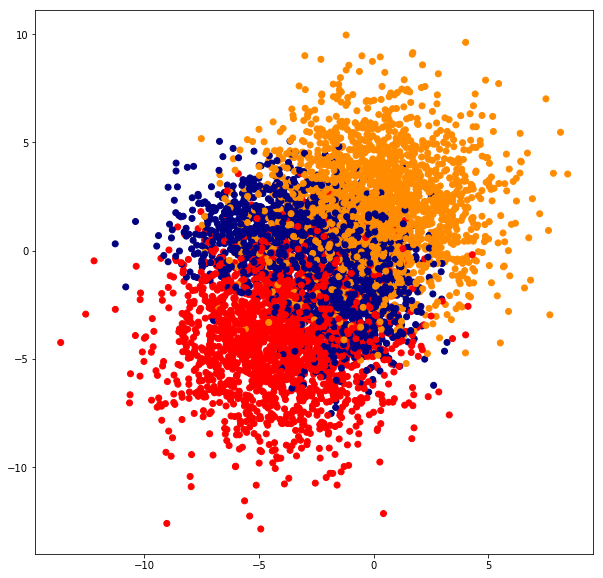

r:  [[ 1.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  1.  1.]]
alphas:  [ 0.34944444  0.2825      0.36805556]
mus:  [[-3.21106383 -4.50506759]
 [-4.44789715  0.5438589 ]
 [ 0.53495764  1.53915345]]
sigmas:  [[[ 1.  0.]
  [ 0.  1.]]

 [[ 1.  0.]
  [ 0.  1.]]

 [[ 1.  0.]
  [ 0.  1.]]]
Starting to train
Epoch: [ 0 ] Current Likelihood: [ -12093.5470217 ]
Epoch: [ 1 ] Current Likelihood: [ -5166.25936409 ]
Epoch: [ 2 ] Current Likelihood: [ -5076.6391211 ]
Epoch: [ 3 ] Current Likelihood: [ -5052.78516258 ]
Epoch: [ 4 ] Current Likelihood: [ -5042.79127163 ]
Epoch: [ 5 ] Current Likelihood: [ -5037.56439298 ]
Epoch: [ 6 ] Current Likelihood: [ -5034.44907315 ]
Epoch: [ 7 ] Current Likelihood: [ -5032.43468622 ]
Epoch: [ 8 ] Current Likelihood: [ -5031.05905056 ]
Epoch: [ 9 ] Current Likelihood: [ -5030.08089518 ]
Epoch: [ 10 ] Current Likelihood: [ -5029.36220472 ]
Epoch: [ 11 ] Current Likelihood: [ -5028.81898027 ]
Epoch: [ 12 ] Current Likelihood: 

Epoch: [ 148 ] Current Likelihood: [ -5023.89164965 ]
Epoch: [ 149 ] Current Likelihood: [ -5023.87848313 ]
Epoch: [ 150 ] Current Likelihood: [ -5023.86562576 ]
Epoch: [ 151 ] Current Likelihood: [ -5023.85307853 ]
Epoch: [ 152 ] Current Likelihood: [ -5023.840842 ]
Epoch: [ 153 ] Current Likelihood: [ -5023.82891628 ]
Epoch: [ 154 ] Current Likelihood: [ -5023.81730102 ]
Epoch: [ 155 ] Current Likelihood: [ -5023.80599549 ]
Epoch: [ 156 ] Current Likelihood: [ -5023.79499852 ]
Epoch: [ 157 ] Current Likelihood: [ -5023.78430854 ]
Epoch: [ 158 ] Current Likelihood: [ -5023.77392361 ]
Epoch: [ 159 ] Current Likelihood: [ -5023.76384142 ]
Training finished. Epoch count:  160


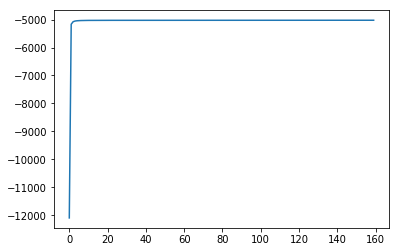

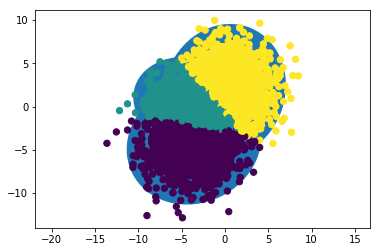

In [6]:
percentages = [60,20,20]
LIKELIHOOD_THRESHOLD = 1e-2

COLORS = ['darkorange','navy','red']
def read_data():
    data = []
    with open('points2d.dat') as fp:
        for line in fp:
            raw = line.split()
            converted = [float(raw[0]),float(raw[1]),int(raw[2])]
            data.append(converted)
    return np.array(data)

def split_data(data):
    first_seperator = (int)(percentages[0]*len(data)/100.0)
    second_seperator = (int)((percentages[0]+percentages[1])*len(data)/100.0)
    
    training_data = data[0:first_seperator]
    validation_data = data[first_seperator:second_seperator]
    test_data = data[second_seperator:]
    
    return training_data,validation_data,test_data

def plot_data(data):
    fig, axs = plt.subplots(1, figsize=(10, 10))
    axs.scatter(data[:,0], data[:,1], c=data[:,2], cmap=matplotlib.colors.ListedColormap(COLORS))
    plt.show()
    
def calculate_normal_probability(x_i, mu_k, sigma_k, dimension):
    first_mult = 1.0/np.power((2*np.pi),float(-dimension)/2) # this dimension might have to be positive "delete -"
    second_mult = np.power(np.abs(np.linalg.det(sigma_k)), -1.0/2) # may be not -1/2 but I think: 1/2
    third_mult = np.exp(-1/2 * np.dot(np.dot((x_i-mu_k).T, np.linalg.inv(sigma_k)), (x_i-mu_k)))
    
    probability = first_mult * second_mult * third_mult
    return probability



# Data must be given as x and y columns, no labels.

def calculate_max_likelihood(data,K,alphas,mus,sigmas,N):
    _ll = 0
    for i in range(N):
        ll_i= 0
        for k in range(K):
            ll_i += alphas[k] * calculate_normal_probability(data[i].T,mus[k].T,sigmas[k],data.shape[1])
        _ll += np.log(ll_i)
    return _ll

def init_params(data,k):
    kmeans = KMeans(n_clusters=k).fit(data)
    
    r = np.zeros([k,len(data)])
    
    # make r values 1 if the kmeans class is high likely for a cluster.
    r[kmeans.labels_,np.arange(len(data))] = 1
    
    alphas = np.bincount(kmeans.labels_)/len(data)
    #alphas = np.ones(k)/float(k)
    mus = kmeans.cluster_centers_
    
    sigmas = []
    for i in range(k):
        sigmas.append(np.identity(data.shape[1]))
    sigmas = np.array(sigmas)
    
    return r,alphas,mus,sigmas
    
def gaussian_mixture(data,K,N):
    r, alphas,mus,sigmas = init_params(data,K)
    print('r: ',r)
    print('alphas: ',alphas)
    print('mus: ',mus)
    print('sigmas: ',sigmas)
    
    likelihoods = []
    #cur_ll = calculate_max_likelihood(data,K,alphas,mus,sigmas,N,r)
    cur_ll = calculate_max_likelihood(data,K,alphas,mus,sigmas,N)
    ll = 0.0
    epoch = 0
    
    print("Starting to train")
    while((epoch == 0) or (np.abs(cur_ll - ll) > LIKELIHOOD_THRESHOLD)):
        ll = cur_ll
        
        print("Epoch: [",epoch, "] Current Likelihood: [", cur_ll,"]")
        
        # ==========================================================================================================
        
        # Expectation Step
        # Calculate r[k][i], which stands for Rik
        s = np.zeros(N)
        for i in range(N):
            temp = np.zeros(K)  # Temporary array
            # Calculate alpha[k]*N(Xi, Uk, Sk) for each data[i] 
            # and the summation of that in all distributions
            for k in range(K):
                #print('DEBUG: val:', calculate_normal_probability(data[i].T, mus[k].T, sigmas[k], data.shape[1]))
                #temp[k] = float(alphas[k]) * calculate_normal_probability(data[i].T, mus[k].T, sigmas[k], data.shape[1])
                temp[k] = calculate_normal_probability(data[i].T, mus[k].T, sigmas[k], data.shape[1])
                s[i] += temp[k]
            for k in range(K):
                r[k][i] = temp[k]/s[i]
        
        
        # ==========================================================================================================
        
        # Maximization Step
        for k in range(K):
            # Calculate alpha[k]
            alphas[k] = np.sum(r[k]) / N
    
            # Calculate mu[k]
            total = np.zeros(mus.shape[1])
            for i in range(N):
                total += r[k][i]* data[i]
            
            mus[k] = total / np.sum(r[k])
            
            # Calculate sigma[k]
            summ = np.zeros([data.shape[1], data.shape[1]])
            for i in range(N):
                if data[i].ndim == 1:
                    # In our case, data[i] and mu[i] are in the shape like [x1, x2],
                    # which is actually a 1-dimension array, rather than 2*1 or 1*2 matrix.
                    # So have to reshape it to a 2*1 matrix
                    data_temp = data[i].reshape(data.shape[1], 1)
                    mu_temp = mus[k].reshape(mus.shape[1], 1)
                    diff_temp = data_temp - mu_temp
                    summ += r[k][i] * np.dot(diff_temp, diff_temp.T)
                else:
                    print('Nazmi')
                    summ += r[k][i] * np.dot(data[i]-mus[i], (data[i]-mus[i]).T)
            
            sigmas[k] = summ / np.sum(r[k])
       
        #cur_ll = calculate_max_likelihood(data,k,alphas,mus,sigmas,N,r)
        likelihoods.append(cur_ll)
        cur_ll = calculate_max_likelihood(data,K,alphas,mus,sigmas,N)
        epoch+=1
    print("Training finished. Epoch count: ", epoch)
    return r, alphas, mus, sigmas,likelihoods

def predict(X, mus, sigmas, dimension):
    probs = np.zeros([len(X),len(mus)])
    labels = np.zeros(len(X))
    for i,x in enumerate(X):
        for k,mu in enumerate(mus):
            probs[i][k] = calculate_normal_probability(x,mu,sigmas[k],dimension)
        labels[i] = np.argmax(probs[i])
    return labels

data = read_data()
N = len(data)
plot_data(data)

training_data, validation_data, test_data = split_data(data)

r,alphas,mus,sigmas,likelihoods = gaussian_mixture(training_data[:,:2],3,len(training_data))

plt.plot(np.arange(len(likelihoods)),likelihoods)
plt.show()

# predicted_labels = predict(test_data[:,:2],mus,sigmas,2)

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(data,mus,sigmas,r,labels,label=True, ax=None):
    ax = ax or plt.gca()
    labels = predict(data,mus,sigmas,2)
    if label:
        ax.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(data[:, 0], data[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / r.max()
    for pos, covar, w in zip(mus, sigmas, r):
        draw_ellipse(pos, covar)

plot_gmm(data[:,:2],mus,sigmas,r,data[:,2])
plt.show()

## B: K-Nearest Neighbor
Steps:
* Implement k-nearest neighbor. 
* Run it with k=1,10,40. 
* Using test set, Report
    - best k,
    - prediction error for all k’s.
    - confusion matrix for all k’s.

In [8]:
def euclidian_distance(train_data,point):
    point = np.array(point)
    differences = train_data - np.ones([len(train_data),point.shape[1]]) * point
    distances = np.sqrt(np.power(differences,2))
    return np.sort(distances)
def predict(train_data,point,k):
    pass
print( euclidian_distance( training_data[:,:2] , [1,2]))

IndexError: tuple index out of range

In [ ]:
a = np.ones([50,2])
b = np.array([1,2])
a*b